### Eine lebensbedrohliche Gefahr einschätzen

<img src='https://www.barmherzige-schwandorf.de/fileadmin/_processed_/f/2/csm_kar_herzinfarkt_b742c35fcc.jpg' style='width:350px;'/>

Wir haben von [Kaggle](https://www.kaggle.com) Informationen zu gewissen Patienten (Raucher und Nicht-Raucher) heruntergeladen `framingham.csv`


Eine Erläuterung für Spaltennamen findet man [hier](https://www.kaggle.com/neisha/heart-disease-prediction-using-logistic-regression).

Ziel dieser Aufgabe ist, anhand relevanten Features in Dataset vorhersagen, welche Patient-innen in nächsten zehn Jahren von einem Herzinfakrt bedroht sind.  

Dabei muss eine einfache Ja-Nein-Frage beantwortet werden.   
Dazu wollen wir zuerst relevante Variablen in Dataset identifizieren und dann die Frage mit Hilfe der logitischen Reggression beantworten.


### 1. Datenvorbbereitung

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Dataframe erstellen und Eckdaten untersuchen
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [4]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### 2. Datenlücken behandeln

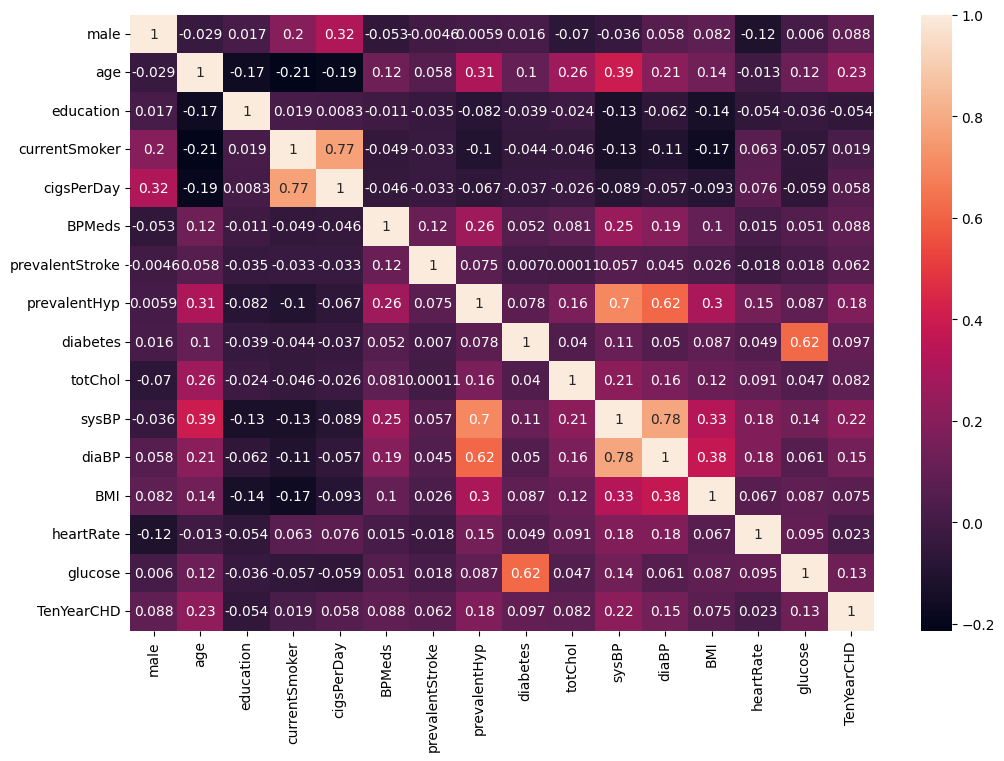

In [6]:
# korrelationsmatrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [7]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Man sollte den Datensatz entsprechnd ausgleichen, dann werden die Ergebnisse besser

In [8]:
df.TenYearCHD.value_counts()

TenYearCHD
0    3596
1     644
Name: count, dtype: int64

In [9]:
# Daten für jede Klasse separieren
class_0 = df[df['TenYearCHD'] == 0]  # Alle Zeilen mit 'TenYearCHD' == 0
class_1 = df[df['TenYearCHD'] == 1]  # Alle Zeilen mit 'TenYearCHD' == 1

# Zufälliges Unterstichprobenziehen von Klasse 0
class_0_balanced = class_0.sample(n=len(class_1), random_state=42)  # Zufällig 644 Zeilen auswählen

# Klassen wieder zusammenführen
df_balanced = pd.concat([class_0_balanced, class_1])

# Datensatz mischen
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Ausgabe der neuen Verteilung
print(df_balanced['TenYearCHD'].value_counts())

TenYearCHD
1    644
0    644
Name: count, dtype: int64


In [10]:
# df = df_balanced

In [11]:
df[df['currentSmoker'] == 1]['cigsPerDay'].mean() # Durchschnitt Zigaretten am Tag

np.float64(19.309006211180126)

In [12]:
# Lücken in 'cigsPerDay' (sind auch nur für aktuelle Raucher belegt) mit Mittelwert ersetzen
df['cigsPerDay'].fillna(18, inplace=True)
df.isna().sum()

male                 0
age                  0
education           33
currentSmoker        0
cigsPerDay           0
BPMeds              21
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             16
sysBP                0
diaBP                0
BMI                 10
heartRate            1
glucose            120
TenYearCHD           0
dtype: int64

In [13]:
df.drop('education', axis=1, inplace=True) # die Spalte 'education' entfernen, weil unwichtig

In [14]:
# Fehlende Daten in 'glucose' mit dem Durchschitt ersetzen
df['glucose'].fillna(df['glucose'].mean(), inplace=True)

In [15]:
# Fehlende Cholestrin werte mit Durchschnitte ersetzen
df['totChol'].fillna(df['totChol'].mean(), inplace=True)

In [16]:
df.isna().sum()

male                0
age                 0
currentSmoker       0
cigsPerDay          0
BPMeds             21
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                10
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

In [17]:
# da die Anzahl des Rests (von Lücken) ein kleiner 
# Teil des Dataset ist, kann entfernt werden
df.dropna(inplace=True) 
df.isna().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [18]:
df.dtypes

male                 int64
age                  int64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

### 3. Ein Modell erstellen, trainieren und auswerten

In [19]:
# model erstellen
mod = LogisticRegression()

In [20]:
# Daten vorbereiten

X = df[['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']]

y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42) # 80% Trainset, 20% Testset

In [21]:
# Modell trainieren
mod.fit(X_train, y_train)

LogisticRegression()

In [22]:
# Scores berechnen
print('Trainset Score (train accuracy):',mod.score(X_train, y_train))
print('Testset Score (test accuracy):',mod.score(X_test, y_test))

Trainset Score (train accuracy): 0.6713147410358565
Testset Score (test accuracy): 0.6309523809523809


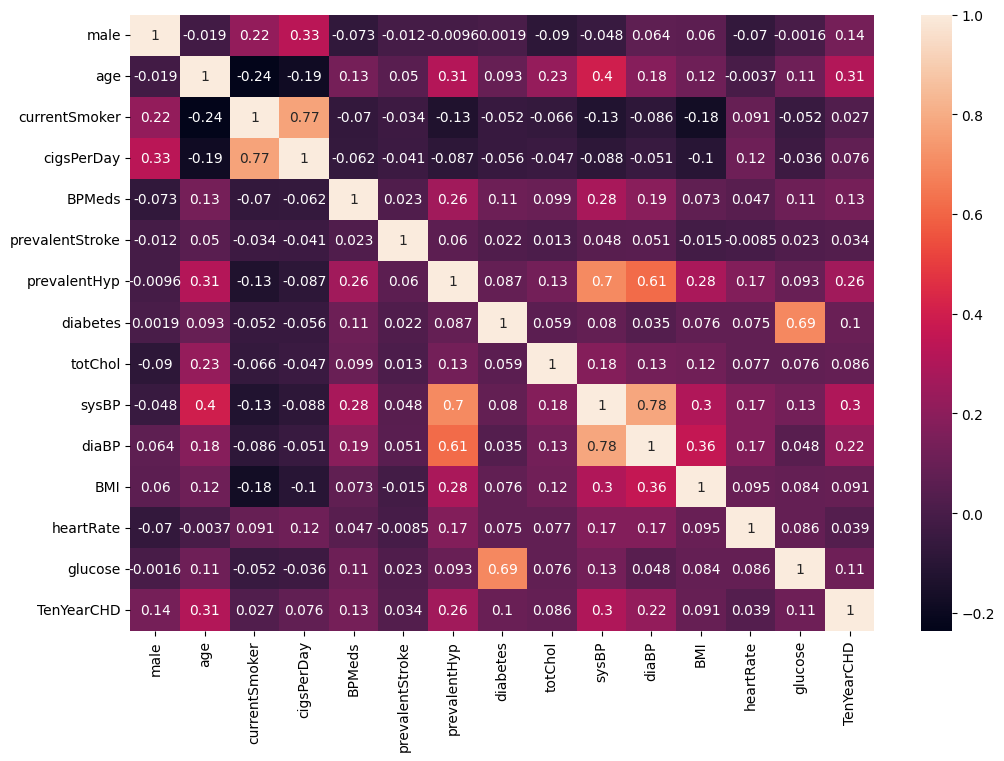

In [23]:
# korrelationsmatrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

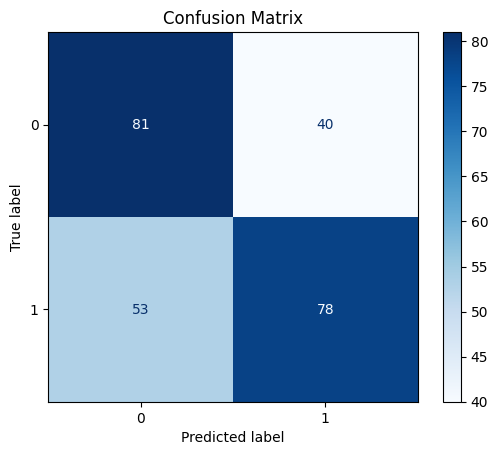

              precision    recall  f1-score   support

           0       0.60      0.67      0.64       121
           1       0.66      0.60      0.63       131

    accuracy                           0.63       252
   macro avg       0.63      0.63      0.63       252
weighted avg       0.63      0.63      0.63       252



In [24]:
# confusion matrix: wird zur Auswertung von Klassifikationsmodellen eingesetzt
# Wo das Modell 'ja' sagt und dabei recht hat: True Positives
# Wo das Modell 'nein' sagt und dabei recht hat: True Negatives
# Wo das modell 'ja' sagt, hat aber unrecht: False Positives
# Wo das Modell 'nein' sagt, hat aber unrecht: False Negatives
# Metrics: F-Score und Recall
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


# Confusion Matrix berechnen
y_true = y_test
y_pred = mod.predict(X_test)
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix anzeigen
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
print(classification_report(y_true, y_pred))